In [53]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv,det,eig
import cv2
import math
from PIL import Image
import heapq
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [54]:
img1 = cv2.imread('1.jpg',0) # image reading with opencv
img2 = cv2.imread('2.jpg',0)
img3 = cv2.imread('3.jpg',0)
img4 = cv2.imread('4.jpg',0)

In [55]:
img_1=np.ravel(img1)
img_2=np.ravel(img2)
img_3=np.ravel(img3)
img_4=np.ravel(img4)
l=[img_1,img_2,img_3,img_4]

In [56]:
cov_data = np.cov(l)
eigen_val,eigen_vector=eig(cov_data)

In [57]:
eigen_val,eigen_vector = (list(t) for t in zip(*sorted(zip(eigen_val,eigen_vector),reverse=True)))

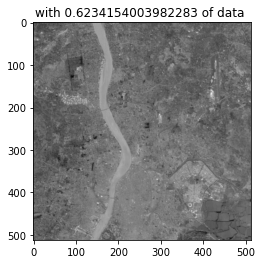

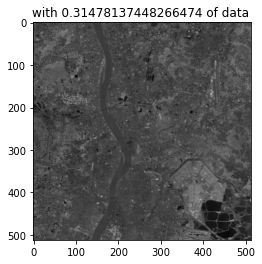

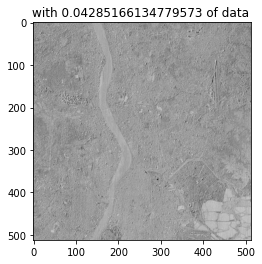

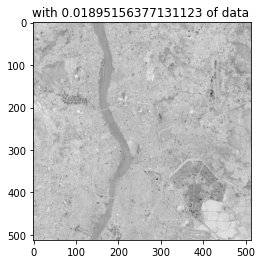

In [58]:
pca=[]
for i in range(0,4):
    s=""
    a=np.asarray(eigen_vector[i])
    b=np.dot(a,l)
    b=b.reshape(512,512)
    pca.append(b)
    s="with "
    s+=str(eigen_val[i]/sum(eigen_val))+" of data "
    plt.title(s)
    plt.imshow(b,cmap="gray")
    plt.show()

In [59]:
#selecting coordinates for river and non river from image 
river=[[154, 20], [158, 31], [100, 488], [161, 165], [165, 46], [170, 467], [174, 54], [175, 67], [179, 110], [172, 114], [172, 133], [159, 144], [177, 453], [167, 185], [160, 185], [167, 188], [162, 193], [168, 200], [173, 210], [172, 219], [184, 229], [181, 213], [191, 245], [185, 252], [184, 247], [197, 251], [200, 255], [195, 270], [203, 271], [209, 274], [215, 282], [212, 289], [212, 296], [221, 300], [226, 309], [218, 311],[147, 7], [155, 20], [158, 35], [165, 41], [163, 50], [172, 62], [170, 74], [178, 83], [177, 98], [183, 106], [176, 114], [180, 124], [173, 133], [167, 150], [161, 172], [167, 183], [162, 195], [165, 192], [165, 205], [173, 215], [183, 232], [183, 246], [194, 246], [196, 258], [202, 267], [218, 314], [207, 323], [204, 336], [205, 350], [208, 354], [197, 363], [192, 370], [188, 381], [182, 399], [207, 277], [212, 280], [212, 289], [219, 294], [218, 306], [225, 312], [220, 323], [227, 324], [219, 332], [225, 336], [216, 336], [209, 323], [220, 340], [208, 345], [219, 339], [209, 348], [217, 346], [202, 358], [200, 349], [199, 360], [191, 373], [188, 384], [185, 389], [190, 386], [163, 166],[186, 400], [184, 410], [164, 470], [151, 488], [149, 504]]
non_river=[[9, 4], [12, 24],[227, 32], [256, 344], [313, 401], [357, 375], [409, 389], [418, 321], [445, 189], [396, 175], [453, 101], [422, 66], [388, 53], [433, 32], [461, 58], [485, 145], [424, 130], [393, 130], [265, 152], [236, 93], [219, 65], [124, 45], [75, 32], [104, 74], [84, 73], [54, 60], [73, 115], [119, 110], [94, 139], [69, 149], [36, 120], [37, 80], [25, 53], [26, 36], [86, 234], [54, 197], [100, 197], [138, 152], [156, 247], [128, 169], [129, 204], [78, 169], [42, 172], [43, 210], [72, 241], [107, 273], [158, 296], [144, 282], [90, 297], [81, 260], [54, 277], [72, 281], [48, 253], [26, 229], [27, 279], [24, 257], [52, 330], [41, 318], [102, 329], [74, 338], [141, 348], [137, 333], [165, 325], [278, 276], [274, 224], [304, 224], [346, 205], [321, 172], [312, 135], [225, 198], [210, 153], [212, 106], [315, 79], [286, 48], [365, 30], [345, 69], [353, 115], [370, 172], [380, 197], [452, 233], [424, 269], [401, 454], [341, 466], [304, 464], [237, 461], [232, 428], [122, 404], [89, 438], [85, 394], [52, 409], [49, 362], [34, 397], [45, 450], [68, 450], [93, 462], [61, 26], [74, 37], [92, 36], [113, 91], [92, 129], [79, 128], [53, 139], [34, 153], [13, 192], [5, 209], [80, 219], [105, 208], [111, 213], [152, 219], [159, 233], [165, 247], [178, 263], [179, 282], [117, 315], [90, 325], [59, 317], [28, 349], [108, 389], [154, 424], [78, 451], [13, 455], [185, 315], [153, 463], [104, 482], [154, 74], [283, 6], [257, 19], [412, 48], [444, 30], [480, 37], [466, 85], [428, 125], [403, 155], [352, 177], [297, 205], [270, 189], [274, 210], [271, 239], [248, 268],[310, 292], [376, 288], [447, 278], [478, 281], [489, 335], [416, 409], [396, 438], [316, 464], [276, 433], [223, 389], [204, 432], [454, 478], [497, 44], [488, 434], [400, 494], [401, 435], [476, 287], [509, 74], [467, 32], [189, 497], [70, 495], [203, 493],[118, 448], [146, 400], [104, 368], [69, 374], [24, 462], [19, 417], [61, 485],[199, 510], [198, 178], [208, 86], [285, 5], [412, 16], [434, 63], [495, 321], [328, 369], [125, 421], [493, 374], [502, 135], [113, 126]]

considering  1 features we get  0.9732142857142857  accuracy
considering  2 features we get  0.9910714285714286  accuracy
considering  3 features we get  0.9910714285714286  accuracy
considering  4 features we get  1.0  accuracy


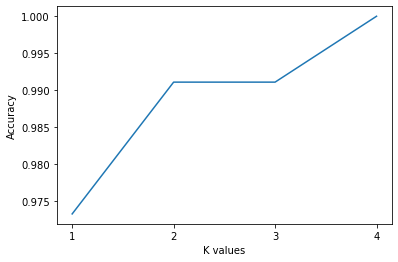

In [68]:
data=[]
label=[]
accuracy=[]
k_value=[]
for k in range(1,5):
    k_value.append(k)
    data=[]
    label=[]
    for i in range (len(river)):
        l=[]
        for j in range(k):
            l.append(pca[j][river[i][1]][river[i][0]])
        data.append(l)
        label.append(0)
    for i in range (len(non_river)):
        l=[]
        for j in range(k):
            l.append(pca[j][non_river[i][1]][non_river[i][0]])
        data.append(l)
        label.append(1)
    data=np.asarray(data)
    X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.4)
    model = GaussianNB()
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    accuracy.append(len([i for i, j in zip(predicted,y_test) if i == j])/len(y_test))
    print("considering ",k,"features we get ",accuracy[-1]," accuracy")
plt.plot(k_value,accuracy)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.xticks(k_value)
plt.show()